In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [7]:
prepost_act_counts <- read_tsv(
    "counts.tsv",
    col_types=cols(
      Donor=col_factor(levels=c("D8", "D9", "D10", "D11", "D14", "D15")),
      Condition=col_factor(levels=c("Thawed", "Pre-activation", "Debeaded")),
      Day=col_factor(levels=c("D1", "D2", "D4")),
      Count=col_factor(levels=c("1", "2")),
      `Total volume (ml)` = col_double(),
      `Live count per ml` = col_double(),
      `Live fraction` = col_double(),
      `Total cells` = col_double()
    ) 
) %>%
mutate(
    `Day`=factor(`Day`, labels=c("Day 1", "Day 2", "Day 4")),
    `Donor`=factor(`Donor`, labels=c("Donor 8", "Donor 9", "Donor 10", "Donor 11", "Donor 14", "Donor 15"))
) %>%
group_by(`Donor`, `Day`, `Condition`) %>%
summarize(
    `Cell_count_avg`=mean(`Live count per ml`),
    `Cell_count_sd`=sd(`Live count per ml`),
    `Live_percent_avg`=mean(`Live fraction`) * 100,
    `Live_percent_sd`=sd(`Live fraction`) * 100
)

prepost_act_counts

Donor,Day,Condition,Cell_count_avg,Cell_count_sd,Live_percent_avg,Live_percent_sd
Donor 8,Day 1,Thawed,2100000,14142.136,98.0,0.0000000
Donor 8,Day 2,Pre-activation,2340000,14142.136,94.0,0.0000000
Donor 8,Day 4,Debeaded,2075000,77781.746,96.5,0.7071068
Donor 9,Day 1,Thawed,1715000,7071.068,95.5,0.7071068
Donor 9,Day 2,Pre-activation,1820000,14142.136,94.0,0.0000000
Donor 9,Day 4,Debeaded,1270000,14142.136,90.5,0.7071068
Donor 10,Day 1,Thawed,818000,53740.115,94.0,0.0000000
Donor 10,Day 2,Pre-activation,601000,12727.922,90.0,0.0000000
Donor 10,Day 4,Debeaded,478000,36769.553,85.5,3.5355339
Donor 11,Day 1,Thawed,2580000,296984.848,97.0,1.4142136


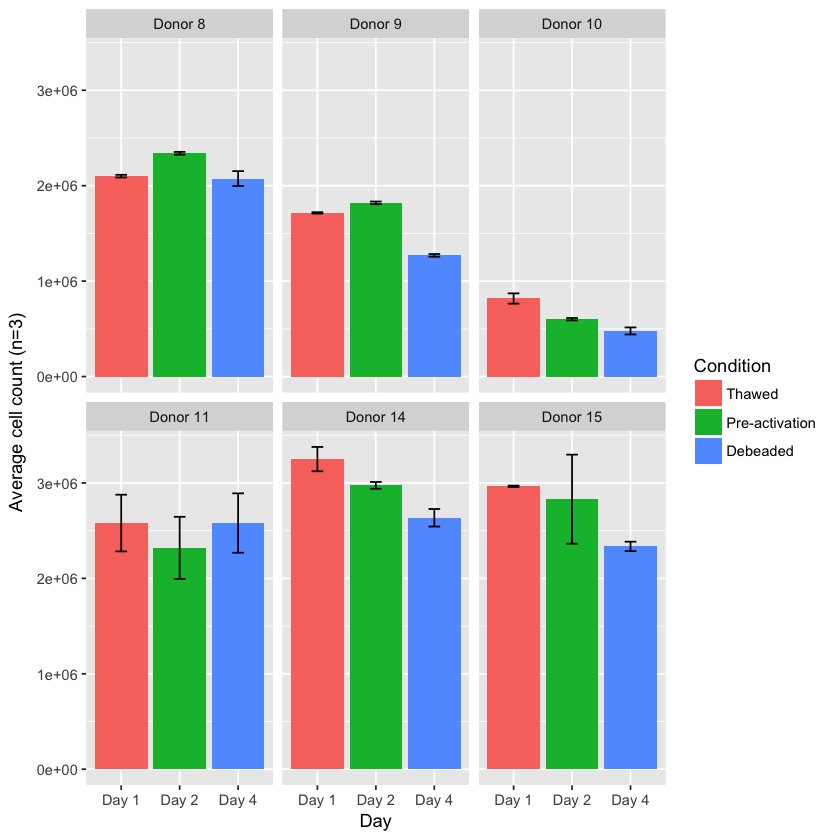

In [14]:
prepost_act_counts %>%
ggplot(aes(x=`Day`, y=`Cell_count_avg`, group=`Donor`, fill=`Condition`)) +
    geom_col() +
    geom_errorbar(
        aes(ymin=`Cell_count_avg`-`Cell_count_sd`, ymax=`Cell_count_avg`+`Cell_count_sd`),
        width=0.2
    ) +
    facet_wrap(~`Donor`, ncol=3) +
    ylab('Average cell count (n=3)')

In [11]:
normalize_by_D1 <- function(x) {
    x / x[1]
}

norm_counts <-
    prepost_act_counts %>%
    group_by(`Donor`) %>%
    mutate(`Norm_value`=normalize_by_D1(`Cell_count_avg`)) %>%
    group_by(`Condition`, `Day`) %>%
    summarize(
        `Avg_FC`=mean(`Norm_value`)*100,
        `Avg_FC_sd`=sd(`Norm_value`)*100
    )

norm_counts

Condition,Day,Avg_FC,Avg_FC_sd
Thawed,Day 1,100.00000,0.00000
Pre-activation,Day 2,94.65512,13.37398
Debeaded,Day 4,81.85437,15.72448


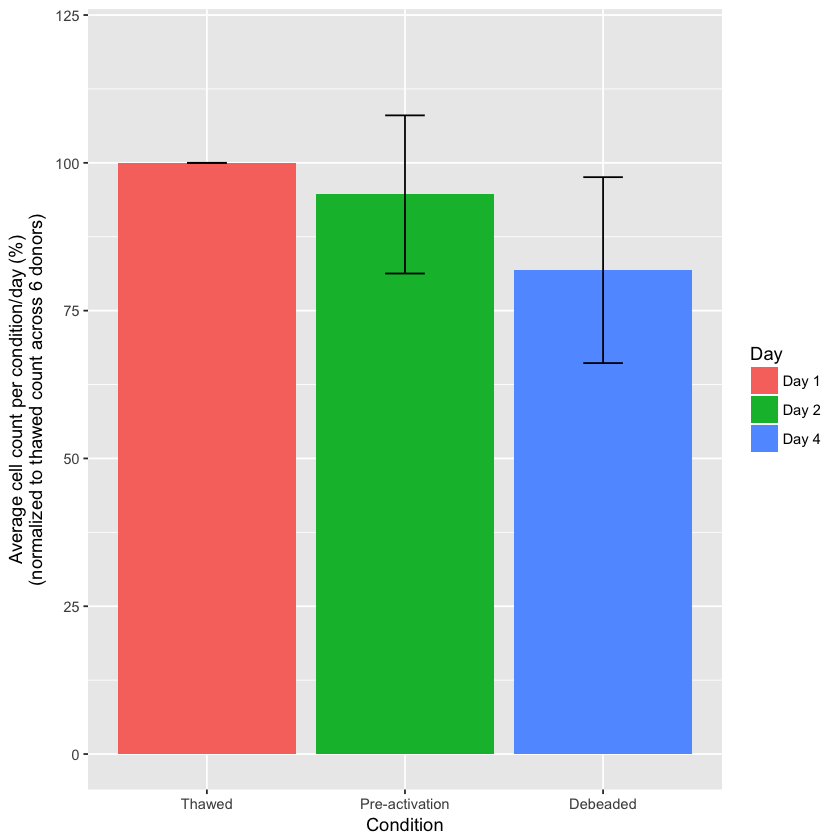

In [19]:
norm_counts %>%
    ggplot(aes(x=`Condition`, y=`Avg_FC`, fill=`Day`)) +
    geom_col() +
    geom_errorbar(
        aes(ymin=`Avg_FC`-`Avg_FC_sd`, ymax=`Avg_FC`+`Avg_FC_sd`),
        width=0.2,
    ) + 
    ylim(0, 120) +
    ylab('Average cell count per condition/day (%)\n(normalized to thawed count across 6 donors)')